In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Train Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape   #return total rows and columns in the dataset

(614, 13)

In [6]:
df.info()  #gathering information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
df.describe() #by_default it takes integer columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data Preprocessing

In [8]:
df.isnull().sum()  # Check missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
# Handling Missing values
# Handling Numerical missing data
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())  
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean()) 
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mean())

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Handling Catagorical missing data
df.Married = df.Married.fillna(df.Married.mode()[0])
df.Gender = df.Gender.fillna(df.Gender.mode()[0])  
df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0]) 
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#Create a new columns
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Exploratory Data Analysis

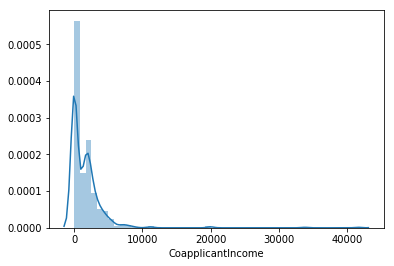

In [15]:
# For Numerical data
# let's see the Distribution of data
sns.distplot(df.CoapplicantIncome)
plt.show()

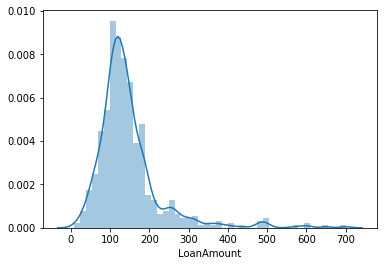

In [16]:
sns.distplot(df.LoanAmount)
plt.show()

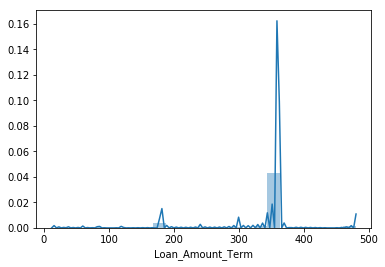

In [17]:
sns.distplot(df.Loan_Amount_Term)
plt.show()

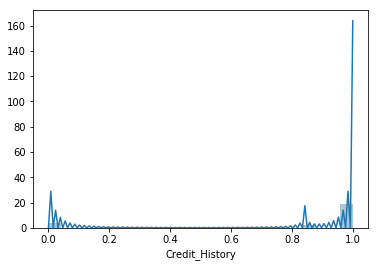

In [18]:
sns.distplot(df.Credit_History)
plt.show()

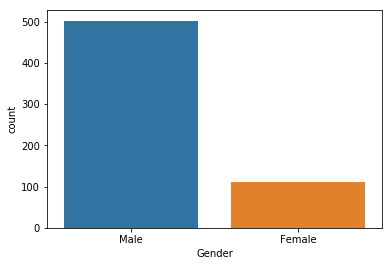

In [19]:
# For Catagorical data
sns.countplot(df.Gender)
plt.show()

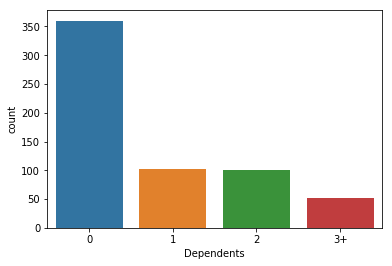

In [20]:
sns.countplot(df.Dependents)
plt.show()

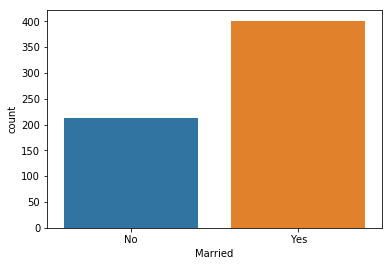

In [21]:
sns.countplot(df.Married)
plt.show()

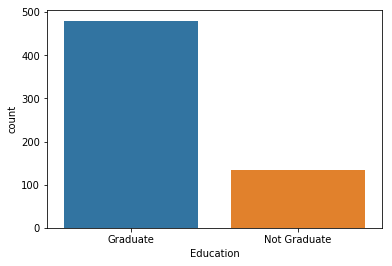

In [22]:
sns.countplot(df.Education)
plt.show()

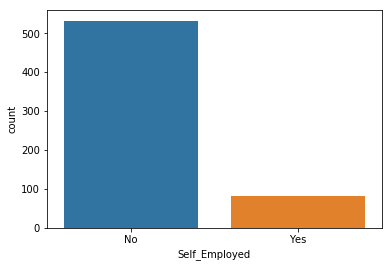

In [23]:
sns.countplot(df.Self_Employed)
plt.show()

### Data Transformation

In [24]:
#For Normal Distribution
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,7024.705081
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [25]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_income_Log'] = np.log(df['Total_income'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,7024.705081,8.341213,-inf,4.862066,5.802065,8.669414
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,6458.663872,0.645263,NaN,0.496575,0.312482,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000,5.010635,-inf,2.197225,2.484907,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000,7.964677,-inf,4.607658,5.886104,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,5416.500000,8.246040,7.080284,4.859812,5.886104,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000,8.664750,7.739462,5.104426,5.886104,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000,11.302204,10.637465,6.551080,6.173786,11.302204


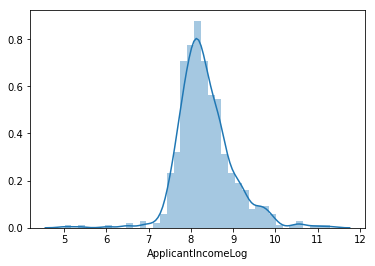

In [27]:
sns.distplot(df.ApplicantIncomeLog)

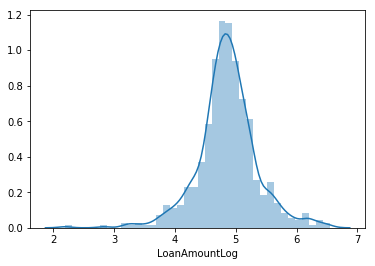

In [28]:
sns.distplot(df.LoanAmountLog)

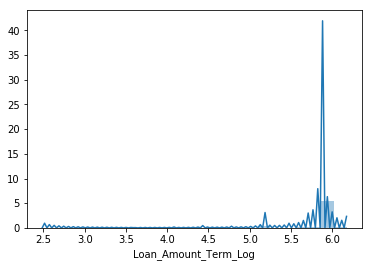

In [29]:
sns.distplot(df.Loan_Amount_Term_Log)

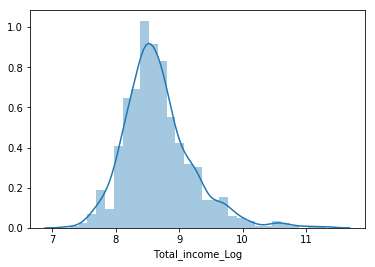

In [30]:
sns.distplot(df.Total_income_Log)

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [32]:
df.shape

(614, 19)

In [33]:
#Drop unnecessary columns
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','CoapplicantIncomeLog']
df = df.drop(columns = cols,axis = 1)

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [35]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [36]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [37]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [38]:
#Handling Catagorical Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                  614 non-null object
Married                 614 non-null object
Dependents              614 non-null object
Education               614 non-null object
Self_Employed           614 non-null object
Credit_History          614 non-null float64
Property_Area           614 non-null object
Loan_Status             614 non-null object
ApplicantIncomeLog      614 non-null float64
LoanAmountLog           614 non-null float64
Loan_Amount_Term_Log    614 non-null float64
Total_income_Log        614 non-null float64
dtypes: float64(5), object(7)
memory usage: 57.6+ KB


In [39]:
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in cols:
    df[col] = pd.get_dummies(df[col],drop_first= True)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
0,1,0,0,0,0,1.0,0,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,0,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,0,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,0,1,8.699515,4.948760,5.886104,8.699515


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                  614 non-null uint8
Married                 614 non-null uint8
Dependents              614 non-null uint8
Education               614 non-null uint8
Self_Employed           614 non-null uint8
Credit_History          614 non-null float64
Property_Area           614 non-null uint8
Loan_Status             614 non-null uint8
ApplicantIncomeLog      614 non-null float64
LoanAmountLog           614 non-null float64
Loan_Amount_Term_Log    614 non-null float64
Total_income_Log        614 non-null float64
dtypes: float64(5), uint8(7)
memory usage: 28.3 KB


In [42]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.166124,0.218241,0.133550,0.842199,0.379479,0.687296,8.341213,4.862066,5.802065,8.669414
std,0.386497,0.476373,0.372495,0.413389,0.340446,0.349681,0.485653,0.463973,0.645263,0.496575,0.312482,0.545102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,2.197225,2.484907,7.273786
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.964677,4.607658,5.886104,8.334712
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8.246040,4.859812,5.886104,8.597205
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.664750,5.104426,5.886104,8.925549
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.302204,6.551080,6.173786,11.302204


### Load Test Dataset

In [43]:
dt = pd.read_csv("test.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [44]:
# Filling Numerical Missing data
dt.LoanAmount = dt.LoanAmount.fillna(dt.LoanAmount.mean())  
dt.Loan_Amount_Term = dt.Loan_Amount_Term.fillna(dt.Loan_Amount_Term.mean()) 
dt.Credit_History = dt.Credit_History.fillna(dt.Credit_History.mean())

# Handling Catagorical missing data
dt.Married = dt.Married.fillna(dt.Married.mode()[0])
dt.Gender = dt.Gender.fillna(dt.Gender.mode()[0])  
dt.Dependents = dt.Dependents.fillna(dt.Dependents.mode()[0]) 
dt.Self_Employed = dt.Self_Employed.fillna(dt.Self_Employed.mode()[0])

# Create a new columns
dt['Total_income'] = dt['ApplicantIncome']+dt['CoapplicantIncome']

# Apply log transformation 
dt['ApplicantIncomeLog'] = np.log(dt['ApplicantIncome'])
dt['CoapplicantIncomeLog'] = np.log(dt['CoapplicantIncome'])
dt['LoanAmountLog'] = np.log(dt['LoanAmount'])
dt['Loan_Amount_Term_Log'] = np.log(dt['Loan_Amount_Term'])
dt['Total_income_Log'] = np.log(dt['Total_income'])

#Drop unnecessary columns
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','CoapplicantIncomeLog']
dt = dt.drop(columns = cols,axis = 1)

cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for col in cols:
    dt[col] = pd.get_dummies(dt[col],drop_first= True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


In [45]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
0,1,1,0,0,0,1.000000,0,8.651724,4.700480,5.886104,8.651724
1,1,1,1,0,0,1.000000,0,8.031385,4.836282,5.886104,8.428581
2,1,1,0,0,0,1.000000,0,8.517193,5.337538,5.886104,8.824678
3,1,1,0,0,0,0.825444,0,7.757906,4.605170,5.886104,8.494129
4,1,0,0,1,0,1.000000,0,8.094378,4.356709,5.886104,8.094378


### Train Test Split

In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
0,1,0,0,0,0,1.0,0,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,0,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,0,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,0,1,8.699515,4.948760,5.886104,8.699515


In [47]:
x = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

### Train the Model

In [49]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 76.62337662337663


In [51]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 68.83116883116884


In [52]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)
print("Accuracy is", model3.score(x_test, y_test)*100)

Accuracy is 77.27272727272727


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
# confusion matrics

In [54]:
# random forest classifier
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[27, 27],
       [ 9, 91]], dtype=int64)

In [55]:
# model save

In [55]:
from sklearn.externals import joblib
joblib.dump(model3,'model.pkl')

['model.pkl']